# Exploratory Data Analysis:

In [6]:
# Show summary statistics
print(satisdf.describe())

                 Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129880.000000    129880.000000    129880.000000  129487.000000   
mean       39.427957      1190.316392        14.713713      15.091129   
std        15.119360       997.452477        38.071126      38.465650   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129880.000000           129880.000000   
mean                                 3.057599                2.756876   
std                                  1.526741                1.401740   
min                                  0.000000     

In [7]:
# Check each feature for missing values
print(satisdf.isnull().sum())

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [8]:
# Replace Null values with 0
satisdf.fillna(0, inplace=True)

In [9]:
# Check again for missing values
print(satisdf.isnull().sum())

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

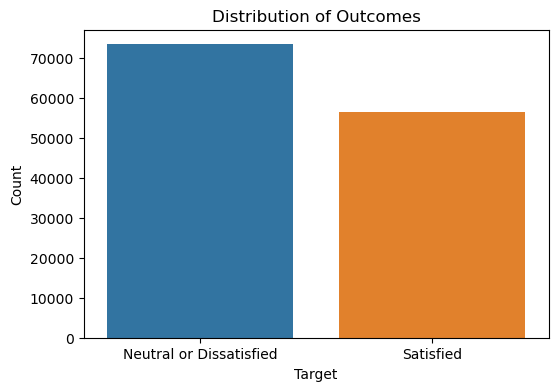

In [10]:
# Plot outcome split
plt.figure(figsize=(6,4))
sns.countplot(x='Satisfaction', data=satisdf)
plt.title('Distribution of Outcomes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [11]:
# Encode the categorical data
label_encoder = preprocessing.LabelEncoder()
categorical = satisdf.select_dtypes(exclude =['number']).columns
columns = satisdf[categorical].apply(label_encoder.fit_transform)
columns.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1


Gender (0 = Female, 1 = Male)
Customer Type (0 = First-time, 1 = Returning)
Type of Travel (0 = Business, 1 = Personal)
Class (0 = Business, 1 = Economy, 2 = Economy Plus)
Satisfaction (0 = Neutral or unsatisfied, 1 = Satisfied)

In [12]:
# Place the encoded data back into the dataset
satisdf[list(columns.columns)] = columns     
satisdf = satisdf.apply(pd.to_numeric, errors='coerce')
satisdf.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


In [13]:
# Set features and target
X = satisdf.drop(['Satisfaction'], axis=1)
y = satisdf['Satisfaction']

# Split data into training and testing sets (80/20 split) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

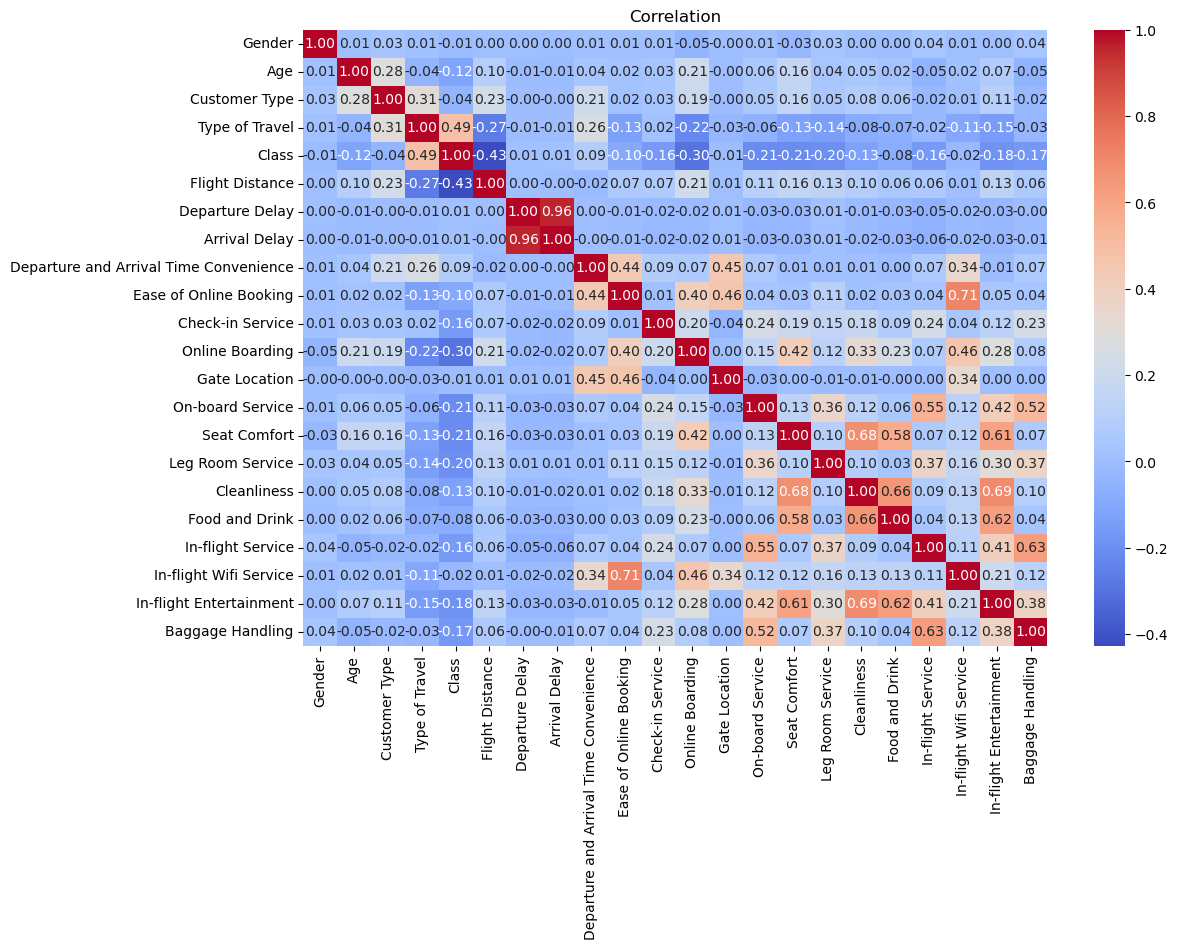

In [14]:
# Show correlation
plt.figure(figsize = (12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation')
plt.show()

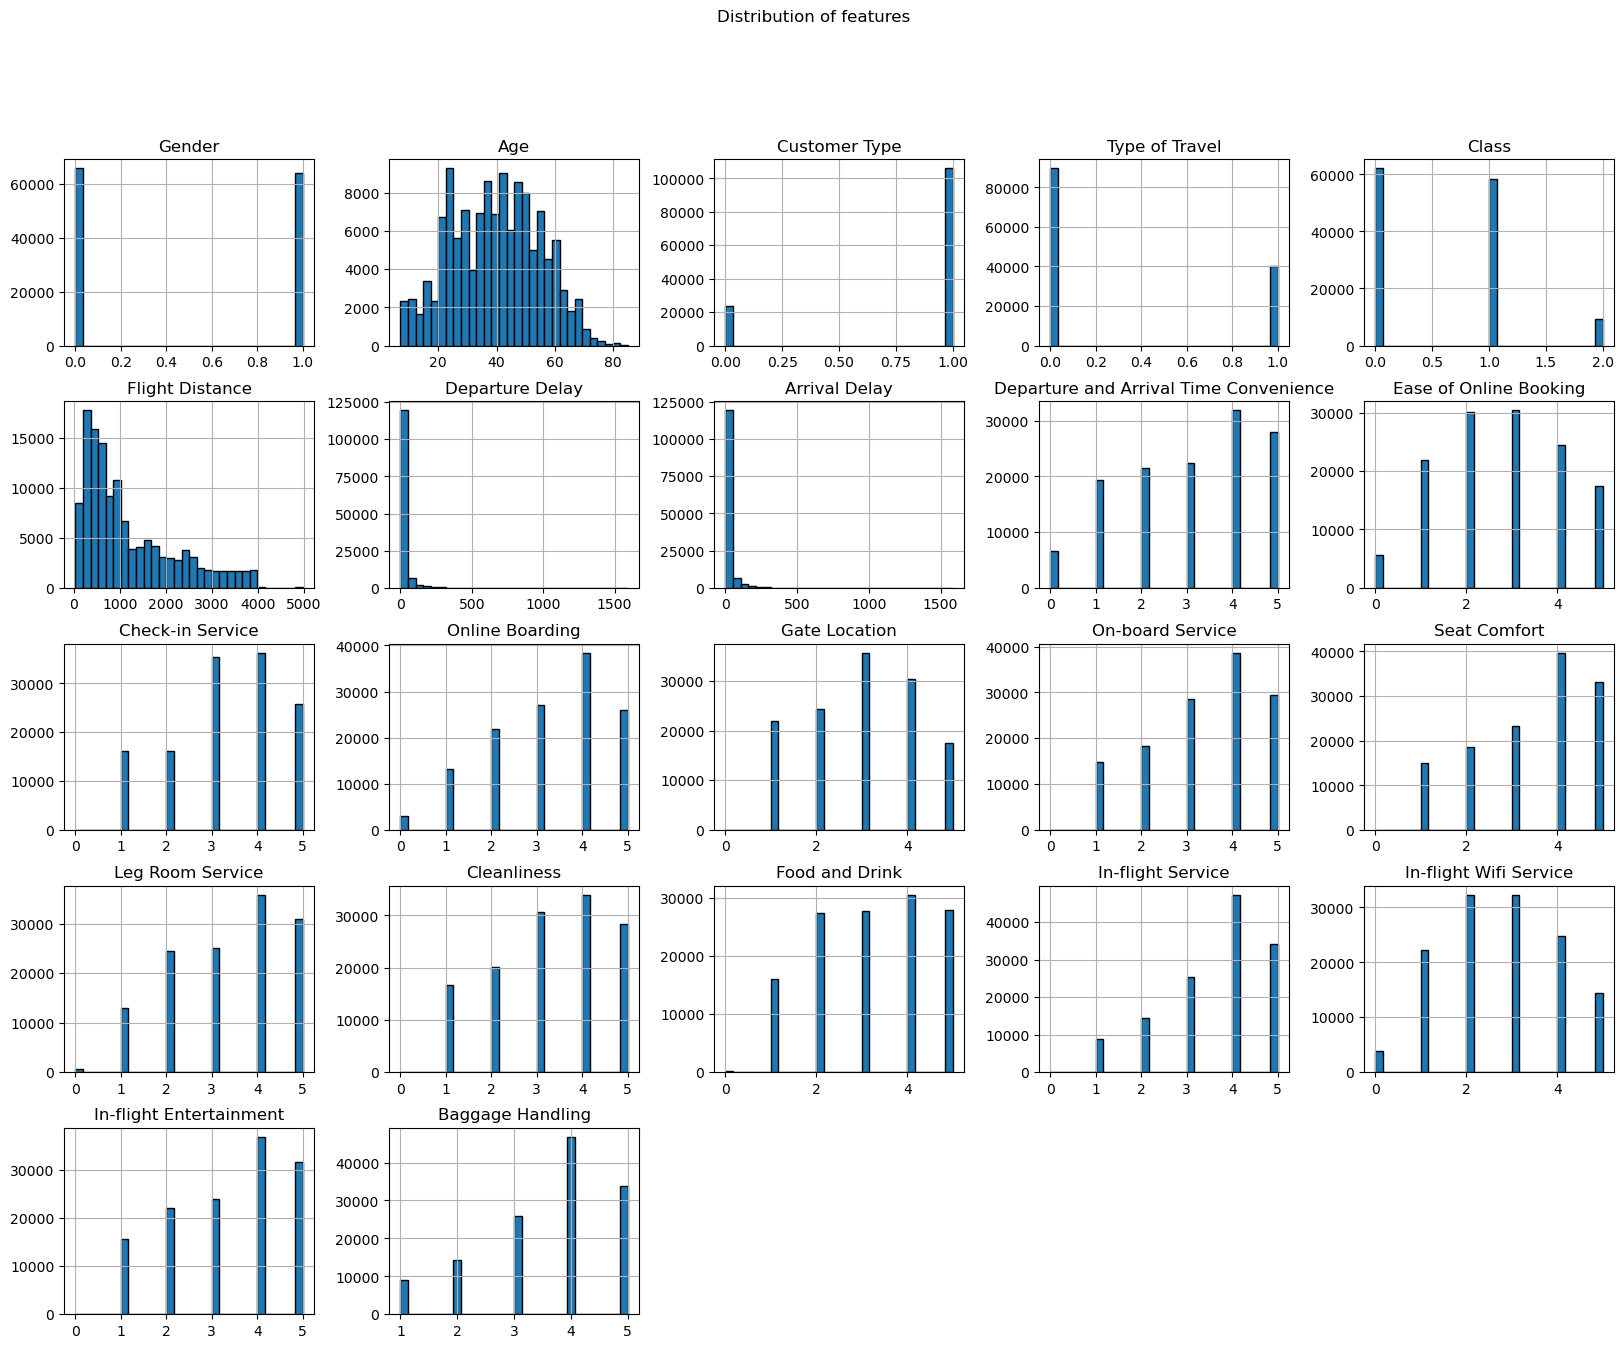

In [15]:
# Show distribution of features
X.hist(bins = 30, figsize = (20, 15), layout = (5, 5), edgecolor = 'black')
plt.suptitle('Distribution of features')
plt.show()